In [0]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

from skimage import data
from skimage.filters import threshold_multiotsu

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# # function for multilevel thresholding
# def replace(img,lb,ub):
#     for i in range(0,img.shape[0]):
#         for j in range(0,img.shape[1]):
#             if img[i][j] < ub and img[i][j] > lb:
#                 img[i][j] = lb
#     return img

# def thresholding(img,thresholds):
#     #iterate over every threshold pair (lower bound, upper bound) 
#     for i in range(0,len(thresholds)-1):
#         img = replace(img,thresholds[i],thresholds[i+1])
#     return img

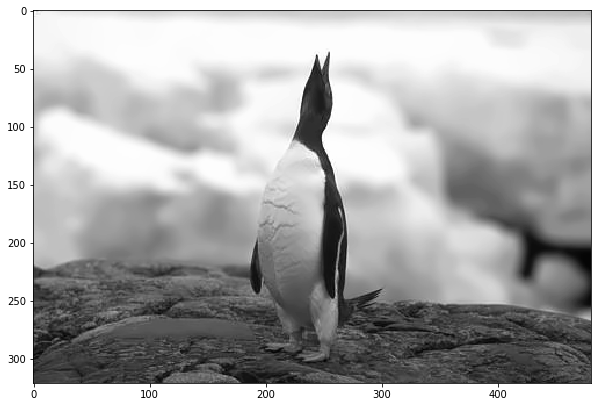

In [55]:

# load image
img = cv.imread('/content/drive/My Drive/Minor project/Code/January/yesterday_folder/images/9.jpg')
# img = cv.imread('leaf.jpg')

# converting image to grayscale
img_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

# apply non-local means filter
nlm_img = cv.fastNlMeansDenoising(img_gray)

plt.figure(figsize=(10,10))
plt.imshow(nlm_img,cmap='gray')

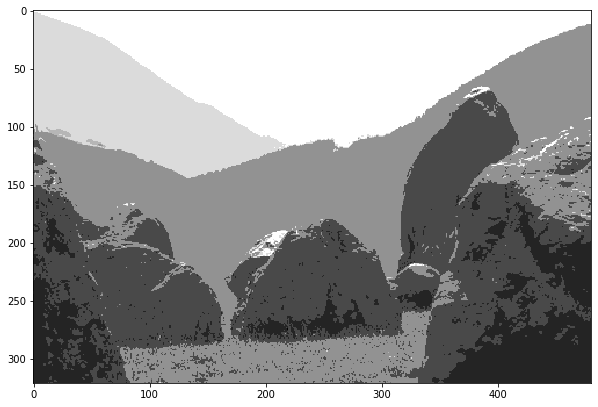

In [44]:
# thresholds recieved from program [8 for gray img, 8 for nlm image]
# PUT YOUR PROGRAM VALUES HERE 'GBEST SCORE'
# x = [0  ,27  ,75, 116 ,130 ,139 ,151 ,153 ,221]
# x = [0   ,5  ,82  ,96 ,101 ,101 ,104 ,133 ,158]
# x = [0  ,25  ,54  ,86 ,154 ,161 ,197 ,201 ,249]
# x =  [0  ,11  ,27  ,29  ,76 ,119 ,137 ,176 ,179]
# x = [0   ,5  ,26  ,72 ,102 ,182 ,205 ,209 ,254]
# x = [0  ,32  ,49  ,89 ,127 ,177 ,210 ,225 ,241]
# x = [0  ,68  ,85 ,110 ,125 ,136 ,181 ,183 ,246]
# x = [0  ,52  ,91 ,112 ,145 ,224 ,229 ,236 ,248]
# x = [0  ,25  ,46 ,128 ,150 ,168 ,194 ,198 ,206]
x = [0   ,8  ,29  ,53  ,97  ,98 ,183 ,185 ,209]

plt.figure(figsize=(10,10))

thresh_img = np.digitize(nlm_img, bins=x)
# gsa image 
plt.imshow(thresh_img,cmap='gray')

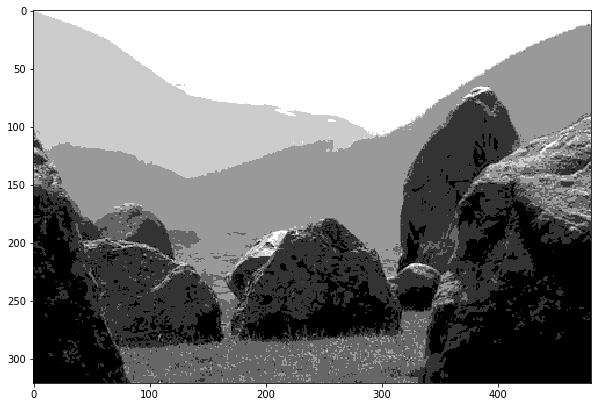

In [43]:
thresholds = threshold_multiotsu(nlm_img, classes= 6)
otsu_img = np.digitize(nlm_img, bins=thresholds)
plt.figure(figsize=(10,10))

# gsa image 
plt.imshow(otsu_img,cmap='gray')